# Pair Progamming RL - Intro

In [103]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).
El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:


In [104]:
df = pd.read_csv('datos/diamonds_def.csv', index_col=0)
df.head()

,est_carat,est_depth,est_table,est_price,est_lenght_mm,est_width_mm,est_depth_mm,cut_encoded,clarity_encoded,color_encoded
1,-1.268160,-1.597233,1.661056,-0.986397,-1.646799,-1.705394,-1.780396,5,3,2
2,-1.224362,0.042616,3.519383,-0.986075,-1.503737,-1.498268,-1.780396,4,1,2
3,-1.092965,0.534571,0.267310,-0.983820,-1.369617,-1.354180,-1.316852,2,4,2
4,-1.049167,1.272504,0.267310,-0.983498,-1.244438,-1.246114,-1.143024,4,2,6
5,-1.202462,0.862541,-0.197272,-0.983175,-1.602092,-1.597328,-1.534138,2,3,7


### 1. Deberéis separar la X y la y.

In [105]:
X = df.drop("est_carat", axis = 1)
y = df["est_carat"]

In [106]:
X.head()

,est_depth,est_table,est_price,est_lenght_mm,est_width_mm,est_depth_mm,cut_encoded,clarity_encoded,color_encoded
1,-1.597233,1.661056,-0.986397,-1.646799,-1.705394,-1.780396,5,3,2
2,0.042616,3.519383,-0.986075,-1.503737,-1.498268,-1.780396,4,1,2
3,0.534571,0.267310,-0.983820,-1.369617,-1.354180,-1.316852,2,4,2
4,1.272504,0.267310,-0.983498,-1.244438,-1.246114,-1.143024,4,2,6
5,0.862541,-0.197272,-0.983175,-1.602092,-1.597328,-1.534138,2,3,7


In [107]:
y.head()

1   -1.268160
2   -1.224362
3   -1.092965
4   -1.049167
5   -1.202462
Name: est_carat, dtype: float64

### 2. Deberéis crear el train y el test.

In [108]:
#creamos los datasets:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [109]:
#creamos el método con la regresión lineal
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### 3. Ajustad vuestro modelo.

In [111]:
y_predict_train = lr.predict(x_train) # hacemos las predicciones para el nº de
y_predict_test = lr.predict(x_test)

In [112]:
df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([df_train,df_test], axis = 0)
resultados.head()

,Real,Predicted,Set
8427,0.045802,0.246916,Train
47965,-0.633079,-0.564571,Train
49194,-0.479783,-0.373481,Train
26207,1.951048,1.563968,Train
23010,1.994846,1.700329,Train


In [113]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
8427,0.045802,0.246916,Train,-0.201114
47965,-0.633079,-0.564571,Train,-0.068507
49194,-0.479783,-0.373481,Train,-0.106302
26207,1.951048,1.563968,Train,0.387080
23010,1.994846,1.700329,Train,0.294517


### Representación gráfica:

Text(0.5, 1.0, 'Test residuos')

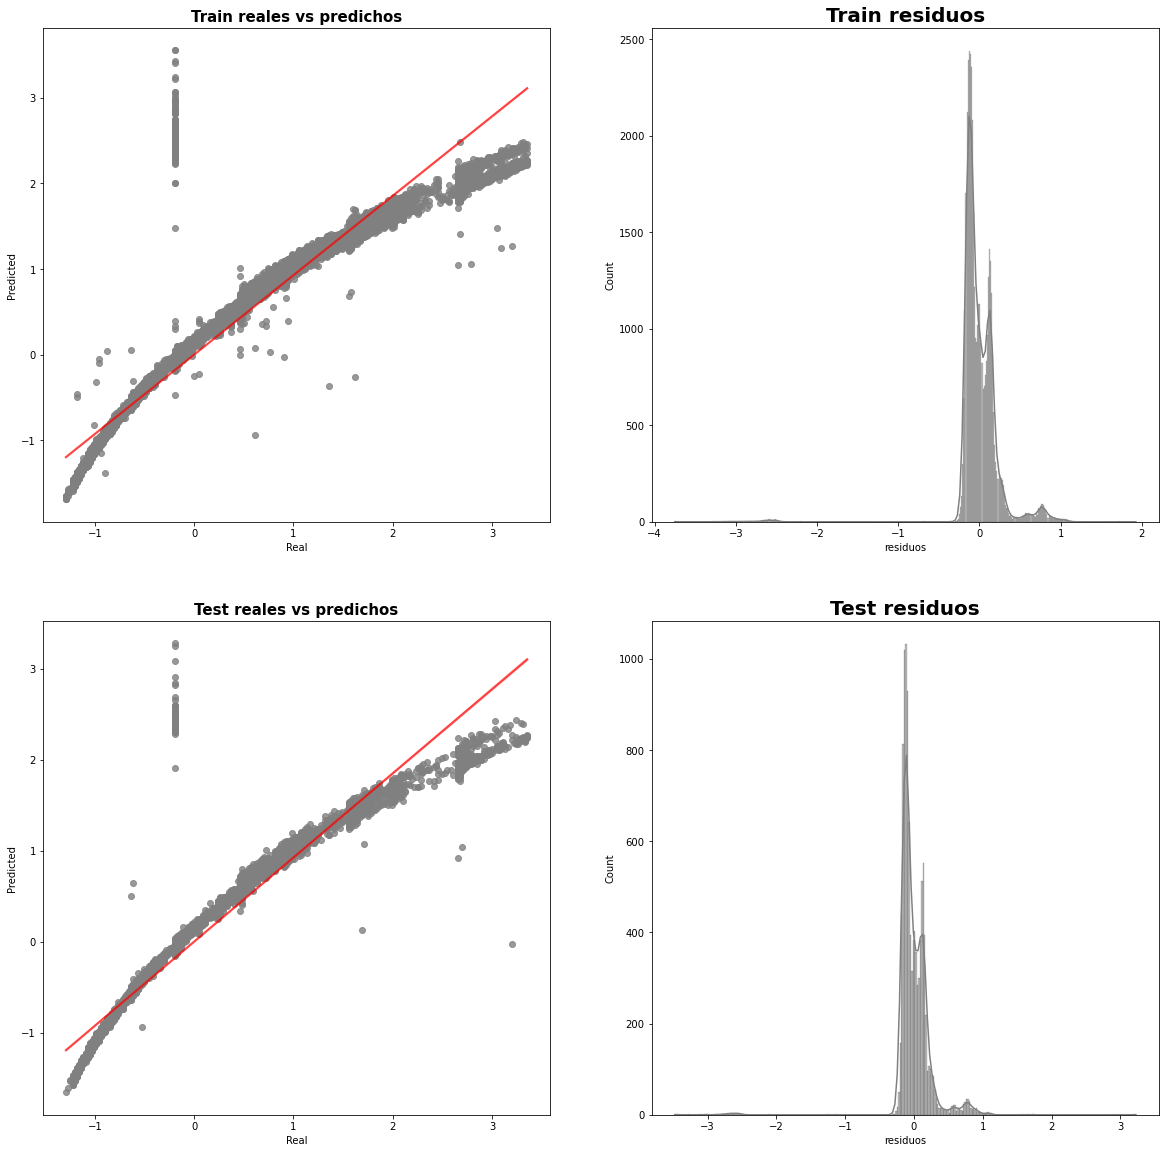

In [114]:
fig, ax = plt.subplots(2,2,figsize=(20,20))
# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"],
            x = "Real",
            y = "Predicted",
            ax = ax[0,0],
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })
sns.regplot(data = resultados[resultados['Set'] == "Test"],
            x = "Real",
            y = "Predicted",
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 },
            ax = ax[1,0])
# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True,
             ax = ax[0,1])
sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True,
             ax = ax[1,1])
ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 20, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 20, fontweight = "bold")

#### **Interpretación:**

- *En la comparación de los valores reales y los predichos*, 

El modelo es capaz de predecir correctamente los valores de carats intermedios (desde el -0.5 hasta 2 carats), observando que se genera una sobreestimación en los extremos que comprenden desde -1.5 hasta -0.5, y de 2 a 3. 

Es decir, dado que en la muestra contamos con una mayoría de diamantes con pocos carats, el modelo predice correctamente aquellos carats con pocos diamantes, pero falla al predecir los datos de los valores extremos de los carats (aquellos que tienen muy pocos o aquellos que tienen muchos, en comparación con la muestra). 

- Este ajuste se observa también en los *residuos*: 

En los diamantes con un menor número de carats, en muchas ocasiones la diferencia entre el valor real y el valor predicho es cercano a cero, por lo que diríamos que los predice con un ajuste adecuado. Sin embargo, a la altura entre el 0 y el 1, se observa un bajón en los residuos, lo que nos indica que es un grupo de diamantes cuyo número de carats está teniendo a infraestimar. Tiene sentido dado que el modelo está más entrenado en diamantes con menos carats.

**Conclusiones**:
- Observable tanto en la gráfica de la regresión como en los residuos, el modelo se ajusta correctamente para carats con un valor bajo-intermedio, pero no para aquellos diamantes con muchos carats, los cuales tenderá a infraestimar.   

Esto se debe a que en la muestra se encuentran, principalmente, diamantes con pocos carats. Por lo tanto, haría falta introducir diamantes de mayor número de carats para que el modelo pudiera estimar sus valores correctamente.

#### Guardamos los distintos df (df_train, df_test, y resultados) en un csv cada uno:

In [115]:
df_train.to_csv('../datos/datos_train.csv')

df_test.to_csv('../datos/datos_test.csv')

resultados.to_csv('../datos/resultados-RL.csv')

In [126]:
#vamos a comprobar primero qué análisis podemos utilizar
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [138]:
cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'), #los cálculos que nos interesa realizar
                cv        = 10) #nº de veces que realizamos la comprobación

#volcamos a un df para facilitar su legibilidad:
cv_scores = pd.DataFrame(cv_scores)
cv_scores #el valor no es realmente negativo, sino positivo

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.059166,0.003963,0.883891,-0.155599
1,0.015145,0.001654,0.936674,-0.130790
2,0.012817,0.001260,0.944980,-0.142904
3,0.010179,0.001134,0.923105,-0.219361
4,0.006408,0.000943,0.660501,-0.657631
5,0.006889,0.001059,0.849918,-0.444632
6,0.006349,0.001058,0.046646,-0.124515
7,0.011605,0.001294,0.786826,-0.093611
8,0.006182,0.000861,0.735276,-0.123779
9,0.007226,0.000822,0.763501,-0.159169


In [144]:
print(f'la media del R2 es = {round(cv_scores["test_r2"].mean(),2)}')

#usamos 'abs' para que nos devuelva el valor absoluto, es decir, que no aparezca negativo:
print(f'la media del RMSE es = {round(abs(cv_scores["test_neg_root_mean_squared_error"].mean()),2)}')

la media del R2 es = 0.75
la media del RMSE es = 0.23


**R2**:

La R^2 representa la proporción de la varianza que es explicada por las VI o VP sobre la VD o VR.

En este caso, podríamos decir que, al tener un R^2 del 75%. Por ello, nuestras VI explican un 75% de la variación que nos encontramos en nuestra VD o VR.

Por otro lado, el 25% restante de la varianza no está explicado por ninguna de las variables VP o VI recogidas en el modelo.


**RMSE:**  

El RMSE nos muestra la distancia entre los valores predichos y los reales. En nuestro caso, su valor es cercano al 0, (0.23) por lo que diríamos que nuestro modelo se ajusta correctamente. Sin embargo, gracias a la representación gráfica sabemos que esto no es cierto, ya que la distribución de los carats no es normal ni lineal.  

Sin embargo, si es un buen modelo para predecir el número de carats de diamantes con un número de carats bajo-intermedio.

